<a href="https://colab.research.google.com/github/rahulbdass/computer_vision_project/blob/main/Rahul_Das_Final_Project_Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#Creating Lane Detection via OPENCV

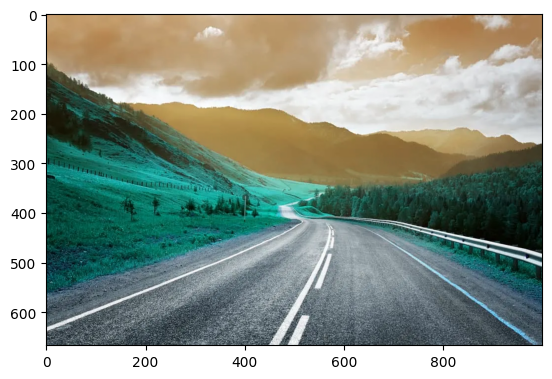

In [ ]:
image_path = r"/content/highland.jpg"
image1 = cv2.imread(image_path)
plt.imshow(image1)


In [ ]:
def canny(img):
  #convert RBG to grey for canny edge detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #blurr coefficient
    kernel = 9
    #gaussian blurr will help in removing noise from image but canny should also do this
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    cv2_imshow(blur)
    #Canny edge detetion algo
    canny = cv2.Canny(blur, 50, 150)
    cv2_imshow(canny)
    return canny


In [ ]:
def region_of_interest(canny):
  #create filter same size as input image
    height = canny.shape[0]
    width = canny.shape[1]
    #create a black image with the same dimensions as original image
    mask = np.zeros_like(canny)

    triangle_highland = np.array([[
    (400, height),
    (600, 300),
    (1100, height),]], np.int32)

    triangle = np.array([[
    (0, height),
    (550, 250),
    (1100, height),]], np.int32)

    triangle_mt = np.array([[
    (0, height),
    (600, 650),
    (1300, height),]], np.int32)
    #create a mask (triangle that isolates the region of interest in our image)
    cv2.fillPoly(mask, triangle_highland, 255)
    cv2_imshow(mask)
    masked_image = cv2.bitwise_and(canny, mask)
    cv2_imshow(masked_image)
    return masked_image

In [ ]:
def make_points(image, line):
    print(line)
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

def average(image, lines):
    left = []
    right = []

    if lines is not None:
      for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        #fit line to points, return slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        print(parameters)
        slope = parameters[0]
        y_int = parameters[1]
        #lines on the right have positive slope, and lines on the left have neg slope
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))

    #takes average among all the columns (column0: slope, column1: y_int)
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    #create lines based on averages calculates
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])

In [ ]:
def display_lines(img,lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


In [ ]:
image = cv2.imread('/content/test_image.jpg')
lane_image = np.copy(image)
lane_canny = canny(lane_image)
cropped_canny = region_of_interest(lane_canny)
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
averaged_lines = average(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)
cv2_imshow(combo_image)

error: ignored

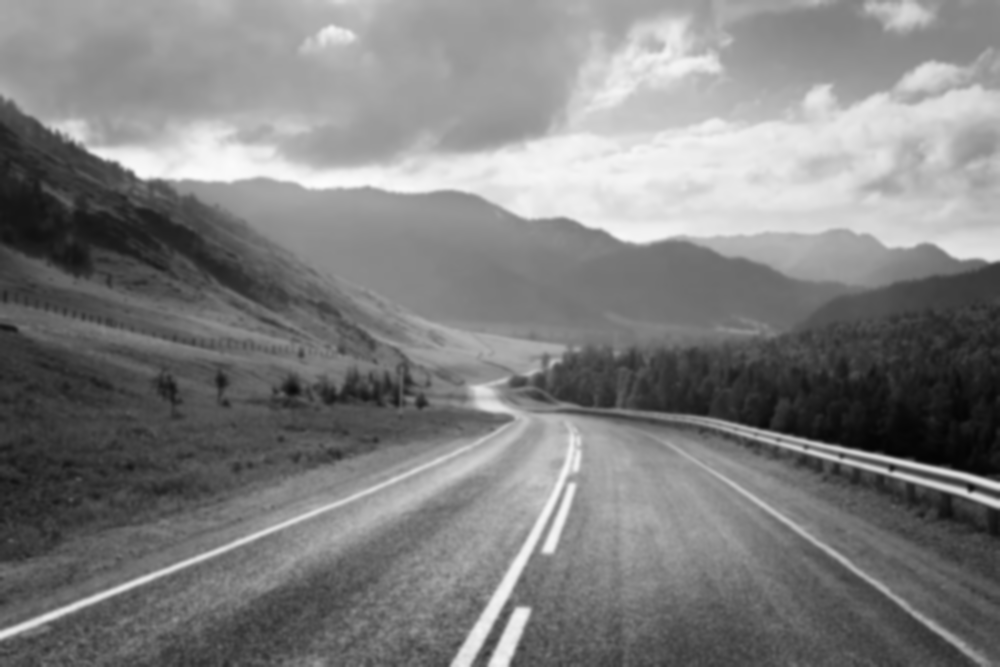

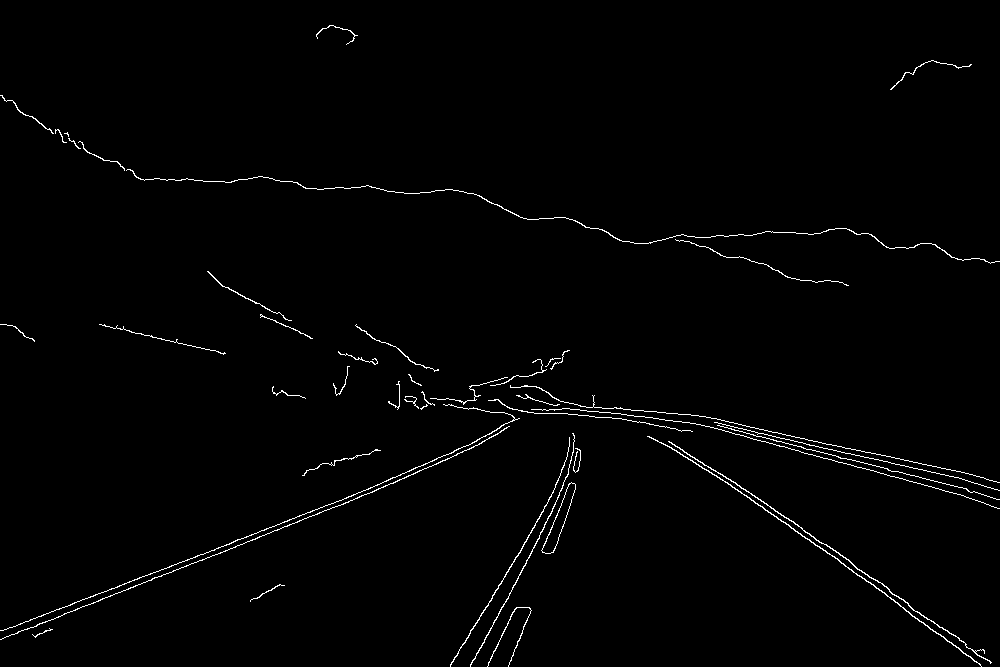

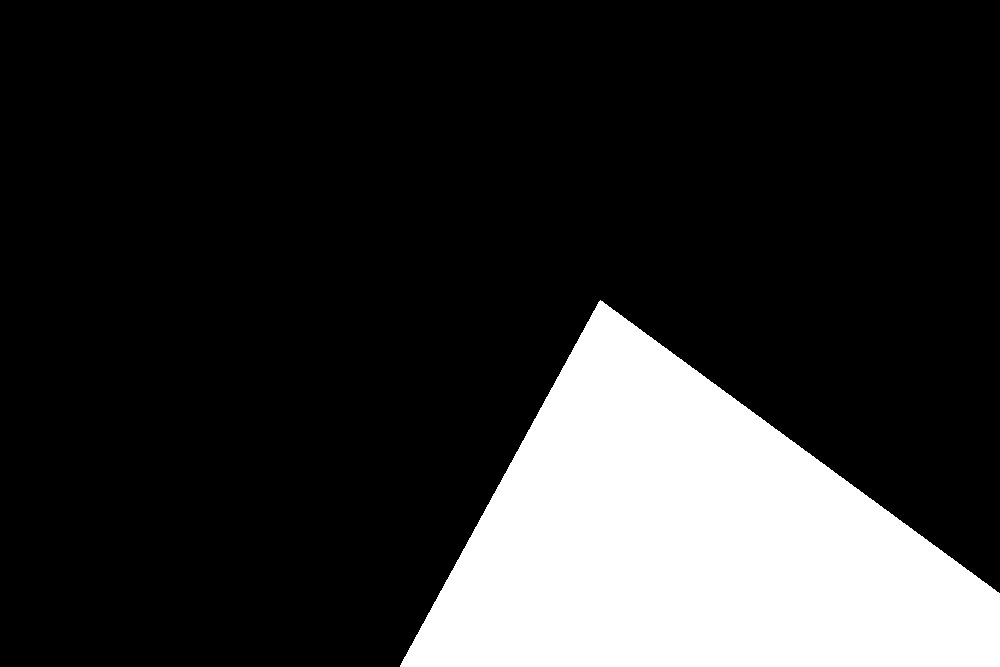

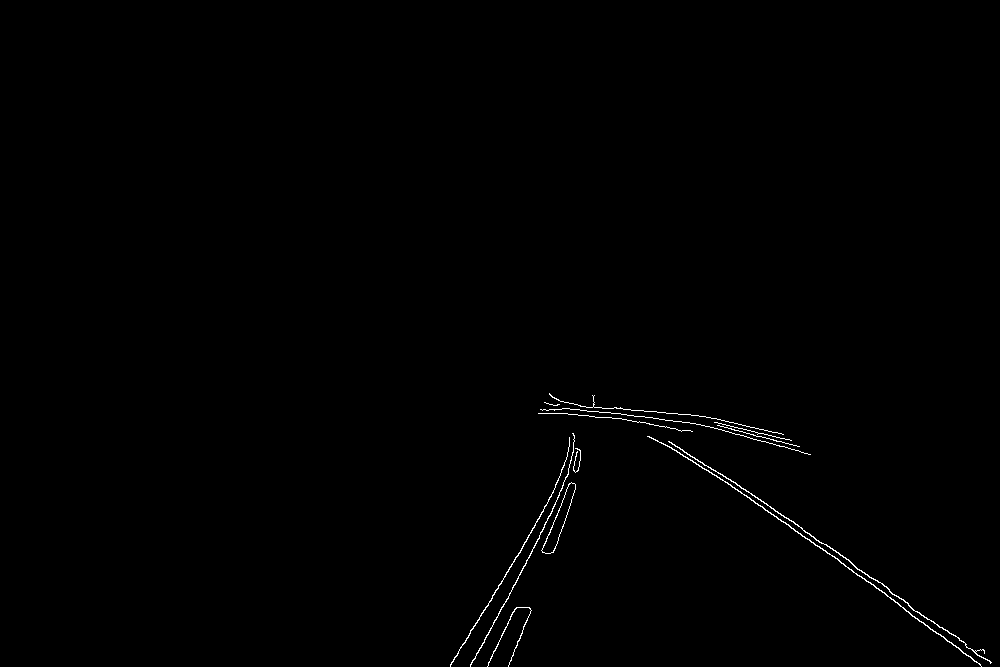

[[[733 481 827 546]]

 [[725 481 852 570]]

 [[503 606 531 553]]

 [[450 666 516 556]]

 [[825 544 878 582]]

 [[621 414 700 424]]

 [[474 659 544 527]]

 [[742 493 783 522]]

 [[861 576 981 666]]

 [[722 474 784 517]]

 [[518 555 558 480]]

 [[665 444 720 479]]

 [[487 666 514 609]]

 [[669 441 711 469]]

 [[767 442 810 454]]

 [[508 666 530 609]]]
[[733 481 827 546]]
[  0.69148936 -25.86170213]
[[725 481 852 570]]
[  0.7007874  -27.07086614]
[[503 606 531 553]]
[  -1.89285714 1558.10714286]
[[450 666 516 556]]
[  -1.66666667 1416.        ]
[[825 544 878 582]]
[  0.71698113 -47.50943396]
[[621 414 700 424]]
[1.26582278e-01 3.35392405e+02]
[[474 659 544 527]]
[  -1.88571429 1552.82857143]
[[742 493 783 522]]
[  0.70731707 -31.82926829]
[[861 576 981 666]]
[  0.75 -69.75]
[[722 474 784 517]]
[  0.69354839 -26.74193548]
[[518 555 558 480]]
[  -1.875 1526.25 ]
[[665 444 720 479]]
[ 0.63636364 20.81818182]
[[487 666 514 609]]
[  -2.11111111 1694.11111111]
[[669 441 711 469]]
[ 0.66666667 -

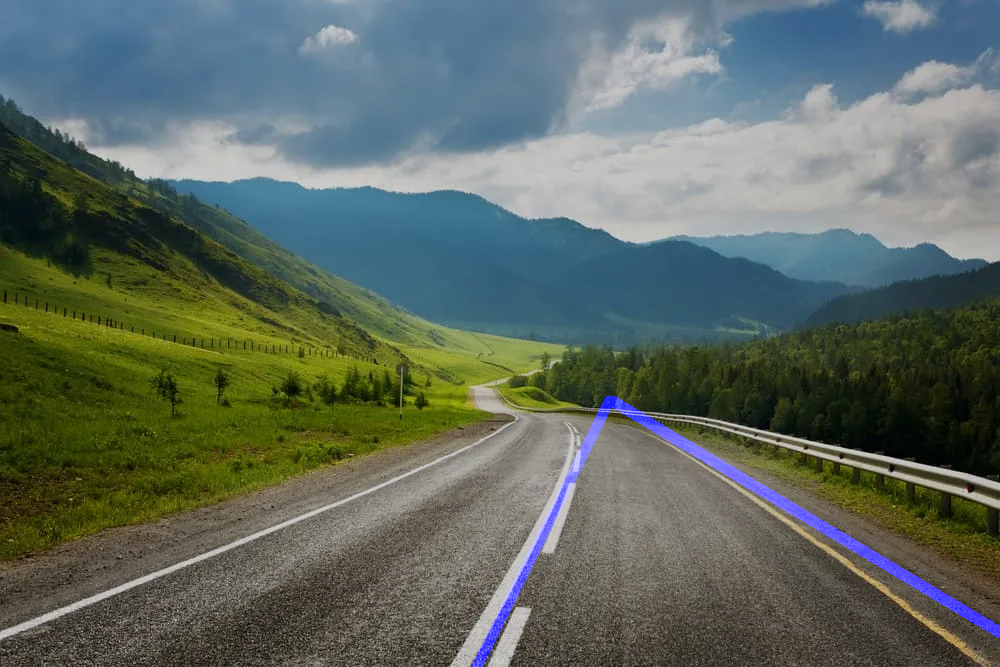

In [ ]:
image = cv2.imread(image_path)
lane_image = np.copy(image)
lane_canny = canny(lane_image)
cropped_canny = region_of_interest(lane_canny)
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
print(lines)
averaged_lines = average(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)
cv2_imshow(combo_image)

In [ ]:
cap = cv2.VideoCapture("/content/original.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny_image = canny(frame)
    cropped_canny = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = average(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2_imshow(combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()